In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_bene = pd.read_csv("Train_Beneficiarydata.csv")
df_in = pd.read_csv("Train_Inpatientdata.csv")
df_out = pd.read_csv("Train_Outpatientdata.csv")
df = pd.read_csv("Train.csv")

In [3]:
# Basic information about the columns

import dabl


df_in_types = dabl.detect_types(df_in)
print("Data types for df_in:")
print(df_in_types)


df_out_types = dabl.detect_types(df_out)
print("Data types for df_out:")
print(df_out_types)


df_bene_types = dabl.detect_types(df_bene)
print("Data types for df_bene:")
print(df_bene_types)

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Data types for df_in:
                        continuous  dirty_float  low_card_int  categorical  \
BeneID                       False        False         False        False   
ClaimID                      False        False         False        False   
ClaimStartDt                 False        False         False        False   
ClaimEndDt                   False        False         False        False   
Provider                     False        False         False        False   
InscClaimAmtReimbursed       False        False          True        False   
AttendingPhysician           False        False         False        False   
OperatingPhysician           False        False         False        False   
OtherPhysician               False        False         False        False   
AdmissionDt                  False        False         False        False   
ClmAdmitDiagnosisCode        False         True         False        False   
DeductibleAmtPaid            False        

In [4]:
# Checking percentage of Nan's and segregating least important columns( > 60% )
from pprint import pprint
nan_percentages = [(col, df_in[col].isna().mean() * 100) for col in df_in.columns]
nan_percentages.sort(key=lambda x: x[1], reverse=True)
removal_col_in = [ x[0] for x in nan_percentages if x[1] > 60]
pprint("inbound_dataset" + str(removal_col_in))


nan_percentages = [(col, df_out[col].isna().mean() * 100) for col in df_out.columns]
nan_percentages.sort(key=lambda x: x[1], reverse=True)
removal_col_out = [ x[0] for x in nan_percentages if x[1] > 60]
pprint("outbound_dataset" + str(removal_col_out))

nan_percentages = [(col, df_bene[col].isna().mean() * 100) for col in df_bene.columns]
nan_percentages.sort(key=lambda x: x[1], reverse=True)
removal_col_bene = [ x[0] for x in nan_percentages if x[1] > 60]
pprint("bene_dataset" + str(removal_col_bene))


("inbound_dataset['ClmProcedureCode_6', 'ClmProcedureCode_5', "
 "'ClmProcedureCode_4', 'ClmProcedureCode_3', 'ClmDiagnosisCode_10', "
 "'OtherPhysician', 'ClmProcedureCode_2']")
("outbound_dataset['ClmProcedureCode_5', 'ClmProcedureCode_6', "
 "'ClmProcedureCode_4', 'ClmProcedureCode_3', 'ClmProcedureCode_2', "
 "'ClmProcedureCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_9', "
 "'ClmDiagnosisCode_8', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_6', "
 "'ClmDiagnosisCode_5', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', "
 "'ClmDiagnosisCode_4', 'OtherPhysician', 'ClmDiagnosisCode_3']")
"bene_dataset['DOD']"


<AxesSubplot:ylabel='col'>

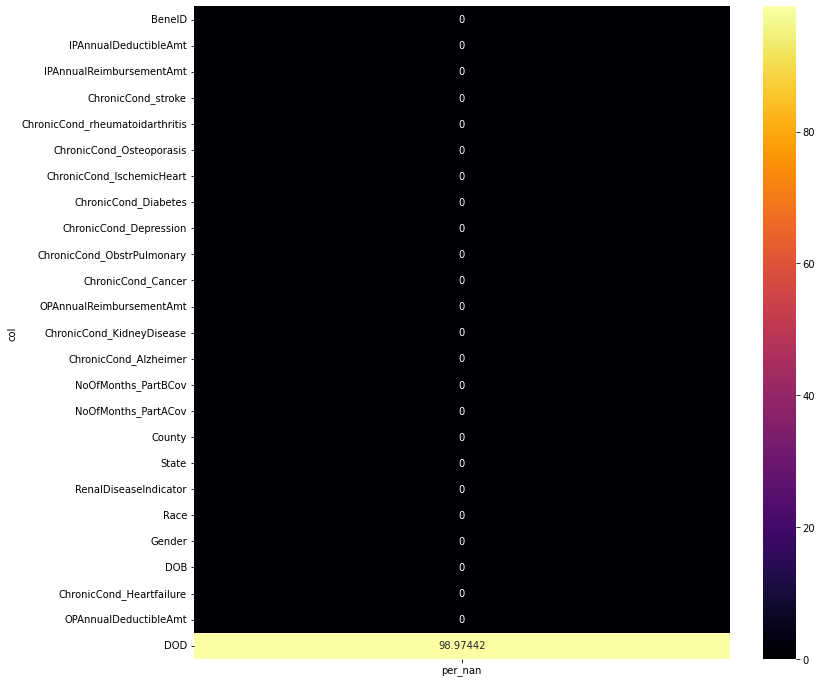

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame([(col, df_bene[col].isna().mean() * 100) for col in df_bene.columns],columns=["col","per_nan"]).set_index("col").sort_values("per_nan"), annot=True, fmt=".7g", cmap='inferno', cbar=True)

<AxesSubplot:ylabel='col'>

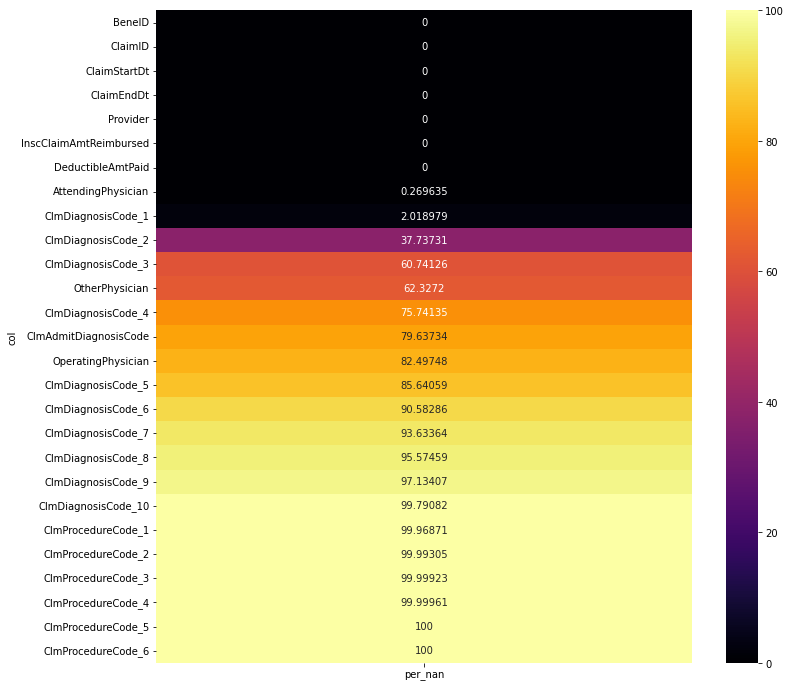

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame([(col, df_out[col].isna().mean() * 100) for col in df_out.columns],columns=["col","per_nan"]).set_index("col").sort_values("per_nan"), annot=True, fmt=".7g", cmap='inferno', cbar=True)

<AxesSubplot:ylabel='col'>

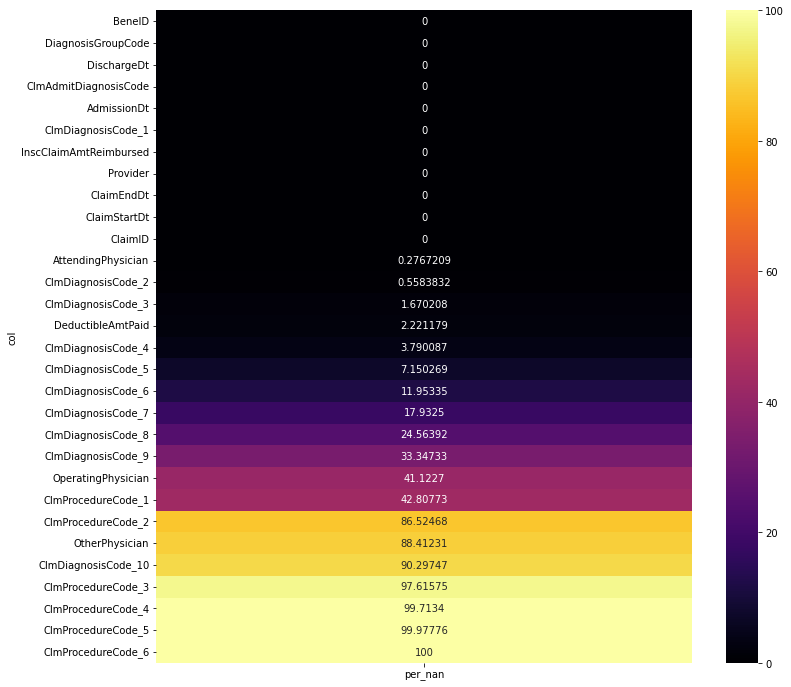

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame([(col, df_in[col].isna().mean() * 100) for col in df_in.columns],columns=["col","per_nan"]).set_index("col").sort_values("per_nan"), annot=True, fmt=".7g", cmap='inferno', cbar=True)

In [3]:
# Feature Engineering: This is done prior to the merging of the dataframes, to reduce Data misalignment, Merging bias, Loss of original information, 

# Converting categorical column to numerical(binarization)
df_bene['living'] = df_bene["DOD"].apply(lambda val: 0 if val != val else 1)


# Generating new column 'claim_time'
import datetime

df_out['ClaimStartDt'] = pd.to_datetime(df_out['ClaimStartDt'])
df_out['ClaimEndDt'] = pd.to_datetime(df_out['ClaimEndDt'])
df_out['claim_time'] = (df_out['ClaimEndDt'] - df_out['ClaimStartDt']).dt.days
df_out['type'] = 0

df_in['ClaimStartDt'] = pd.to_datetime(df_in['ClaimStartDt'])
df_in['ClaimEndDt'] = pd.to_datetime(df_in['ClaimEndDt'])
df_in['claim_time'] = (df_in['ClaimEndDt'] - df_in['ClaimStartDt']).dt.days
df_in['type'] = 1

# Gender binarization
df_bene['Gender'] = df_bene['Gender'].apply(lambda x: 0 if x == 2 else 1)


<AxesSubplot:>

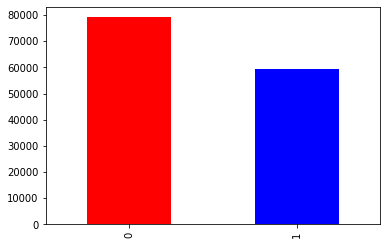

In [6]:
df_bene['Gender'].value_counts().plot(kind='bar', color=['red','blue'])

In [4]:
# Merging all the datasets

df_1 = pd.merge(left=df_in,right=df_out,how='outer')
df_2 = pd.merge(df_1,df_bene,on="BeneID")

In [8]:
df_2.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_time,type,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.727940,0.072507,...,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,0.007400
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,4.904984,0.259325,...,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,0.085707
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,0.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,0.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,0.000000,0.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,0.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,36.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,1.000000


<AxesSubplot:ylabel='columns'>

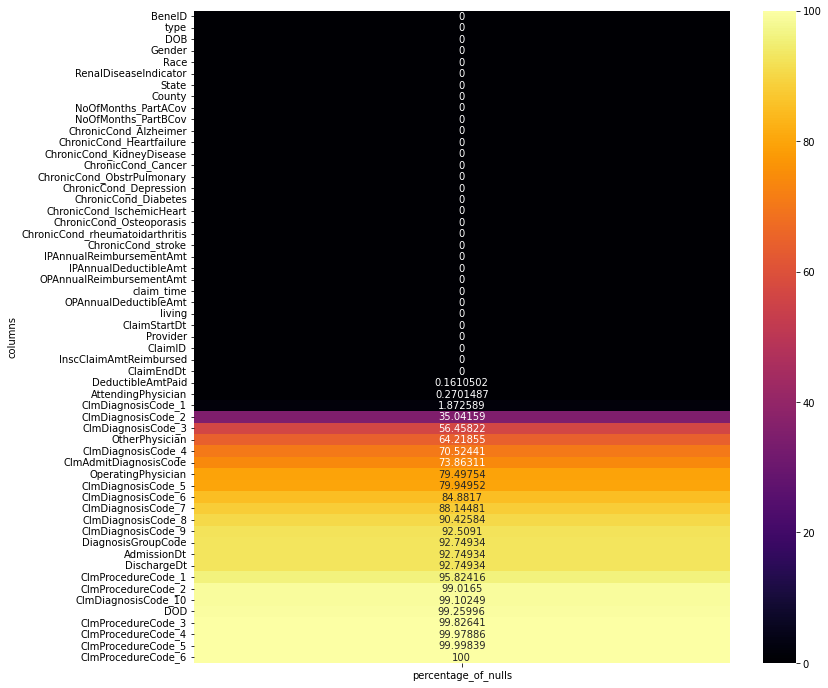

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame([(col, df_2[col].isna().mean() * 100) for col in df_2.columns],columns=["columns","percentage_of_nulls"]).set_index("columns").sort_values("percentage_of_nulls"), annot=True, fmt=".7g", cmap='inferno', cbar=True)

<AxesSubplot:>

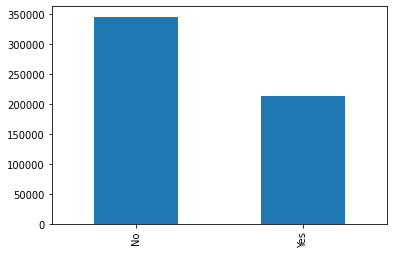

In [5]:
df_label = pd.read_csv("Train.csv")
df_fin = pd.merge(df_label,df_2, on= "Provider")

df_fin["PotentialFraud"].value_counts().plot(kind="bar")

In [6]:
nan_percentages = [(col, df_fin[col].isna().mean() * 100) for col in df_fin.columns]
nan_percentages.sort(key=lambda x: x[1], reverse=True)
removal_cols = [ x[0] for x in nan_percentages if x[1] > 70]
removal_cols.remove("OperatingPhysician")
removal_cols

['ClmProcedureCode_6',
 'ClmProcedureCode_5',
 'ClmProcedureCode_4',
 'ClmProcedureCode_3',
 'DOD',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_2',
 'ClmProcedureCode_1',
 'AdmissionDt',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_5',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_4']

In [8]:
df_final = df_fin.drop(removal_cols,1)
df_final.to_csv("final.csv")

In [16]:
df_final["PotentialFraud"]

0         No
1         No
2         No
3         No
4         No
          ..
558206    No
558207    No
558208    No
558209    No
558210    No
Name: PotentialFraud, Length: 558211, dtype: object

In [18]:
# Drop DOB, BeneID, ClaimID, ClaimStartDt','ClaimEndDt'
df_final = df_final.drop(["DOB", "BeneID", "ClaimID", "ClaimStartDt","ClaimEndDt","Provider"],1)
df_final

<ipython-input-18-acbacd79af13>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_final.drop(["DOB", "BeneID", "ClaimID", "ClaimStartDt","ClaimEndDt","Provider"],1)


,PotentialFraud,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living
0,No,500,PHY318842,PHY392882,NaN,0.0,78964,V442,5589,1,...,1,1,2,2,2,2020,1068,6700,2700,0
1,No,36000,PHY340163,NaN,NaN,1068.0,29650,2971,3051,4,...,1,1,2,2,1,36000,1068,3520,140,0
2,No,12000,PHY346762,NaN,NaN,1068.0,0388,5849,2841,2,...,2,2,2,2,2,95000,2136,2270,900,0
3,No,70,PHY402512,NaN,NaN,0.0,78965,NaN,NaN,0,...,2,1,1,2,2,5000,1068,370,70,0
4,No,3000,PHY383193,NaN,NaN,1068.0,56211,5533,0088,5,...,1,1,2,1,2,3000,1068,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,No,300,PHY321072,NaN,NaN,0.0,78650,72252,NaN,0,...,1,2,2,2,2,0,0,860,1010,0
558207,No,1100,PHY321072,PHY321072,PHY321072,40.0,72740,78052,56942,9,...,1,1,1,1,2,0,0,1780,320,0
558208,No,200,PHY321072,NaN,NaN,0.0,V1251,72981,NaN,0,...,2,2,2,2,2,0,0,200,200,0
558209,No,3300,PHY321072,NaN,PHY321072,0.0,41406,40290,NaN,0,...,1,1,2,2,2,0,0,3700,240,0


In [19]:
def physician_same(row):
    att_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    opr_other=row["OperatingPhysician"]==row["OtherPhysician"]
    att_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if att_oper==True and opr_other==True:
        return 0
    elif att_oper==True and opr_other==False:
        return 1
    elif att_oper==False and opr_other==True:
        return 2
    else:
        return 3
    
df_final["phy_status"]=df_final.apply(physician_same,1)
df_final

,PotentialFraud,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status
0,No,500,PHY318842,PHY392882,NaN,0.0,78964,V442,5589,1,...,1,2,2,2,2020,1068,6700,2700,0,3
1,No,36000,PHY340163,NaN,NaN,1068.0,29650,2971,3051,4,...,1,2,2,1,36000,1068,3520,140,0,3
2,No,12000,PHY346762,NaN,NaN,1068.0,0388,5849,2841,2,...,2,2,2,2,95000,2136,2270,900,0,3
3,No,70,PHY402512,NaN,NaN,0.0,78965,NaN,NaN,0,...,1,1,2,2,5000,1068,370,70,0,3
4,No,3000,PHY383193,NaN,NaN,1068.0,56211,5533,0088,5,...,1,2,1,2,3000,1068,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,No,300,PHY321072,NaN,NaN,0.0,78650,72252,NaN,0,...,2,2,2,2,0,0,860,1010,0,3
558207,No,1100,PHY321072,PHY321072,PHY321072,40.0,72740,78052,56942,9,...,1,1,1,2,0,0,1780,320,0,0
558208,No,200,PHY321072,NaN,NaN,0.0,V1251,72981,NaN,0,...,2,2,2,2,0,0,200,200,0,3
558209,No,3300,PHY321072,NaN,PHY321072,0.0,41406,40290,NaN,0,...,1,2,2,2,0,0,3700,240,0,3


In [20]:
#df_final.drop_duplicates(inplace=1)
df_final["Fraud"] = np.where(df_final["PotentialFraud"]=="No",0,1)
df_final["phy_status"].value_counts()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   PotentialFraud                   558211 non-null  object 
 1   InscClaimAmtReimbursed           558211 non-null  int64  
 2   AttendingPhysician               556703 non-null  object 
 3   OperatingPhysician               114447 non-null  object 
 4   OtherPhysician                   199736 non-null  object 
 5   DeductibleAmtPaid                557312 non-null  float64
 6   ClmDiagnosisCode_1               547758 non-null  object 
 7   ClmDiagnosisCode_2               362605 non-null  object 
 8   ClmDiagnosisCode_3               243055 non-null  object 
 9   claim_time                       558211 non-null  int64  
 10  type                             558211 non-null  int64  
 11  Gender                           558211 non-null  int64  
 12  Ra

In [21]:
#df_final['RenalDiseaseIndicator'].head(50)
df_final['Renal_Indicator'] = df_final['RenalDiseaseIndicator'].apply(lambda x: 1 if x == 'Y' else 0)
df_final['claim_time']= df_final['claim_time'].fillna(0)
df_final['claim_time'] = df_final['claim_time'].apply(lambda x: int(x))

df_final["DeductibleAmtPaid"] = df_final['DeductibleAmtPaid'].fillna(0)
df_final["DeductibleAmtPaid"] = df_final['DeductibleAmtPaid'].apply(lambda x: int(x))
df_final['claim_time'].unique()

array([ 1,  4,  2,  0,  5, 14,  9,  6, 20,  7,  3, 15, 11, 13, 27,  8, 18,
       12, 16, 17, 19, 10, 28, 23, 24, 25, 33, 29, 35, 21, 22, 30, 26, 32,
       31, 34, 36])

In [22]:
df_final = df_final.drop(['PotentialFraud','OperatingPhysician','AttendingPhysician','OtherPhysician','RenalDiseaseIndicator'],1)

<ipython-input-22-c73425e62bbf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_final.drop(['PotentialFraud','OperatingPhysician','AttendingPhysician','OtherPhysician','RenalDiseaseIndicator'],1)


In [23]:
#df_final["DeductibleAmtPaid"] = df_final['DeductibleAmtPaid'].apply(lambda x: int(x))
df_final["DeductibleAmtPaid"].value_counts()

0       497600
1068     39575
100       4582
70        2420
60        2065
40        2045
80        2024
50        1969
20        1406
30        1336
90        1245
10        1203
200        734
865          2
876          2
897          2
886          1
Name: DeductibleAmtPaid, dtype: int64

In [24]:
df_final.groupby('type')['claim_time'].agg('sum')

type
0    735462
1    229093
Name: claim_time, dtype: int64

In [25]:
# Do you wanna make values with unique_count < 100 to be nan, and then apply frequency_encoder
from sklearn.preprocessing import RobustScaler, LabelEncoder,OrdinalEncoder

# df_final["ClmDiagnosisCode_1"].apply(lambda x : x if len(df_final[df_final["ClmDiagnosisCode_1" == x]]) < 100 else np.nan)

freq = df_final["ClmDiagnosisCode_1"].value_counts(normalize=True)

df_final["ClmDiagnosisCode_1"] = df_final["ClmDiagnosisCode_1"].map(freq)

freq = df_final["ClmDiagnosisCode_2"].value_counts(normalize=True)

df_final["ClmDiagnosisCode_2"] = df_final["ClmDiagnosisCode_2"].map(freq)

freq = df_final["ClmDiagnosisCode_3"].value_counts(normalize=True)

df_final["ClmDiagnosisCode_3"] = df_final["ClmDiagnosisCode_3"].map(freq)

In [26]:
df_final[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
           'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
           'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
           'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
           'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
           'ChronicCond_stroke']] = df_final[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                              'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
                                              'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                                              'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                                              'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                              'ChronicCond_stroke']].replace({1: 0, 2: 1})
df_final["chronic_count"] = df_final[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']].apply(lambda x: x.sum(), axis=1)
df_final["chronic_count"]

0          3
1          5
2         10
3          7
4          5
          ..
558206    10
558207     5
558208    11
558209     9
558210     9
Name: chronic_count, Length: 558211, dtype: int64

In [27]:
df_final = df_final.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'],1)0
df_final

<ipython-input-27-6b1c0f165d1d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_final.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Fraud,Renal_Indicator,chronic_count
0,500,0,0.000730,0.000074,0.000625,1,0,1,1,1,410,2020,1068,6700,2700,0,3,0,0,3
1,36000,1068,0.000236,0.000041,0.007278,4,1,1,1,1,510,36000,1068,3520,140,0,3,0,0,5
2,12000,1068,0.000089,0.001790,0.000362,2,1,1,1,1,160,95000,2136,2270,900,0,3,0,0,10
3,70,0,0.000783,NaN,NaN,0,0,1,1,1,510,5000,1068,370,70,0,3,0,0,7
4,3000,1068,0.000712,0.002416,0.000053,5,1,0,1,1,510,3000,1068,0,0,0,3,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,300,0,0.004352,0.002066,NaN,0,0,1,1,21,210,0,0,860,1010,0,3,0,0,10
558207,1100,40,0.000148,0.001227,0.000062,9,0,0,2,21,210,0,0,1780,320,0,0,0,0,5
558208,200,0,0.000181,0.001351,NaN,0,0,1,2,21,210,0,0,200,200,0,3,0,0,11
558209,3300,0,0.000727,0.000549,NaN,0,0,0,2,21,210,0,0,3700,240,0,3,0,0,9


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

y_1 = df_final["Fraud"]
X_1 = df_final.drop("Fraud",1)

model = LinearRegression()
imputer = SimpleImputer(missing_values=np.nan, strategy=model)
imputer.fit(X_1)
X_imputed = imputer.transform(X_1)

print("Original dataset:\n", X_1)
print("Imputed dataset:\n", X_imputed)

<ipython-input-30-deed951fd195>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_1 = df_final.drop("Fraud",1)


Original dataset:
         InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCode_1  \
0                          500                  0            0.000730   
1                        36000               1068            0.000236   
2                        12000               1068            0.000089   
3                           70                  0            0.000783   
4                         3000               1068            0.000712   
...                        ...                ...                 ...   
558206                     300                  0            0.004352   
558207                    1100                 40            0.000148   
558208                     200                  0            0.000181   
558209                    3300                  0            0.000727   
558210                      40                  0            0.000126   

        ClmDiagnosisCode_2  ClmDiagnosisCode_3  claim_time  type  Gender  \
0                 0.000074  

In [38]:
df_imputed = pd.DataFrame(X_imputed,columns=X_1.columns)
df_imputed.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'claim_time', 'type',
       'Gender', 'Race', 'State', 'County', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'living', 'phy_status', 'Renal_Indicator',
       'chronic_count'],
      dtype='object')

In [40]:
# Standard_scaler: "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt","InscClaimAmtReimbursed","DeductibleAmtPaid"
# Min-Max scaler: Race, state, county

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_max_state = MinMaxScaler()
scaler_max = MinMaxScaler()
df_imputed[["State"]] = scaler_max_state.fit_transform(df_imputed[["State"]])
df_imputed[["Race","County"]] = scaler_max.fit_transform(df_imputed[["Race","County"]])
scaler_std = StandardScaler()
df_imputed[["IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt","InscClaimAmtReimbursed","DeductibleAmtPaid"]] = scaler_std.fit_transform(df_imputed[["IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt","InscClaimAmtReimbursed","DeductibleAmtPaid"]])


In [41]:
df_imputed.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Renal_Indicator,chronic_count
count,5.582110e+05,5.582110e+05,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,5.582110e+05,5.582110e+05,5.582110e+05,5.582110e+05,558211.000000,558211.000000,558211.000000,558211.000000
mean,1.759138e-17,1.804962e-17,0.002016,0.010226,0.009483,1.727940,0.072507,0.421162,0.063753,0.461264,0.378967,3.440629e-17,7.568620e-17,-5.310509e-17,-1.293259e-17,0.007400,2.752402,0.196786,6.501384
std,1.000001e+00,1.000001e+00,0.005106,0.012990,0.010004,4.904984,0.259325,0.493746,0.179359,0.286656,0.265481,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.085707,0.707003,0.397569,2.332301
min,-2.608933e-01,-2.859416e-01,0.000002,0.000003,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122321e+00,-4.823359e-01,-6.049254e-01,-6.483891e-01,0.000000,0.000000,0.000000,0.000000
25%,-2.504263e-01,-2.859416e-01,0.000120,0.001371,0.003616,0.000000,0.000000,0.000000,0.000000,0.188679,0.150150,-4.435648e-01,-4.823359e-01,-4.683923e-01,-5.286310e-01,0.000000,3.000000,0.000000,5.000000
50%,-2.399593e-01,-2.859416e-01,0.000444,0.010226,0.009483,0.000000,0.000000,0.000000,0.000000,0.433962,0.350350,-4.435648e-01,-4.823359e-01,-2.854895e-01,-3.090744e-01,0.000000,3.000000,0.000000,6.000000
75%,-1.823908e-01,-2.859416e-01,0.001196,0.010226,0.009483,0.000000,0.000000,1.000000,0.000000,0.698113,0.570571,6.550240e-02,4.233847e-01,8.031614e-02,1.400184e-01,0.000000,3.000000,0.000000,8.000000
max,3.244851e+01,3.614518e+00,0.025351,0.061715,0.059279,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.325628e+01,3.197435e+01,2.593659e+01,1.316371e+01,1.000000,3.000000,1.000000,11.000000


In [43]:
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE,ADASYN

smote = ADASYN(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(df_imputed,y_1)
X_train_resampled

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Renal_Indicator,chronic_count
0,-0.130056,-0.285942,0.000730,0.000074,0.000625,1.0,0.0,1.0,0.000000,0.000000,0.410410,-0.272179,0.423385,1.139092,2.046168,0.0,3.0,0.0,3.0
1,9.159414,3.614518,0.000236,0.000041,0.007278,4.0,1.0,1.0,0.000000,0.000000,0.510511,2.610838,0.423385,0.319893,-0.508671,0.0,3.0,0.0,5.0
2,2.879209,3.614518,0.000089,0.001790,0.000362,2.0,1.0,1.0,0.000000,0.000000,0.160160,7.616665,1.329105,-0.002119,0.249797,0.0,3.0,0.0,10.0
3,-0.242576,-0.285942,0.000783,0.010226,0.009483,0.0,0.0,1.0,0.000000,0.000000,0.510511,-0.019342,0.423385,-0.491577,-0.578530,0.0,3.0,0.0,7.0
4,0.524132,3.614518,0.000712,0.002416,0.000053,5.0,1.0,0.0,0.000000,0.000000,0.510511,-0.189031,0.423385,-0.586893,-0.648389,0.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711424,-0.193945,-0.285942,0.002690,0.006550,0.005842,0.0,0.0,0.0,0.500000,0.830189,0.910911,-0.443565,-0.482336,-0.079402,0.768748,0.0,3.0,0.0,2.0
711425,-0.239408,-0.285942,0.000298,0.007967,0.009483,0.0,0.0,0.0,0.444084,0.783767,0.839266,-0.443565,-0.482336,-0.125497,0.706248,0.0,3.0,0.0,2.0
711426,-0.241148,-0.285942,0.000399,0.010226,0.009483,0.0,0.0,0.0,0.000000,0.830189,0.916376,-0.443565,-0.482336,-0.427411,0.015729,0.0,3.0,0.0,8.0
711427,-0.156223,-0.285942,0.000466,0.057389,0.009483,0.0,0.0,1.0,0.000000,0.835641,0.725059,-0.443565,-0.482336,-0.156469,-0.527910,0.0,3.0,0.0,9.0


In [31]:
dfd = pd.concat([X_train_resampled, y_train_resampled],1)
dfd.to_csv("scaled_sampled_1.csv")

NameError: name 'X_train_resampled' is not defined

In [1]:
import pandas as pd

dfd = pd.read_csv('scaled_sampled_1.csv')
X_train_resampled = dfd.iloc[:,:-1]
y_train_resampled = dfd.iloc[:,-1:]
X_train_resampled = X_train_resampled.drop('Unnamed: 0',1)
X_train_resampled

<ipython-input-1-86c9b08bd6a7>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_resampled = X_train_resampled.drop('Unnamed: 0',1)


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Renal_Indicator,chronic_count
0,-0.130056,-0.285942,0.000730,0.000074,0.000625,1.0,0.0,1.0,0.000000,0.000000,0.410410,-0.272179,0.423385,1.139092,2.046168,0.0,3.0,0.0,3.0
1,9.159414,3.614518,0.000236,0.000041,0.007278,4.0,1.0,1.0,0.000000,0.000000,0.510511,2.610838,0.423385,0.319893,-0.508671,0.0,3.0,0.0,5.0
2,2.879209,3.614518,0.000089,0.001790,0.000362,2.0,1.0,1.0,0.000000,0.000000,0.160160,7.616665,1.329105,-0.002119,0.249797,0.0,3.0,0.0,10.0
3,-0.242576,-0.285942,0.000783,0.010226,0.009483,0.0,0.0,1.0,0.000000,0.000000,0.510511,-0.019342,0.423385,-0.491577,-0.578530,0.0,3.0,0.0,7.0
4,0.524132,3.614518,0.000712,0.002416,0.000053,5.0,1.0,0.0,0.000000,0.000000,0.510511,-0.189031,0.423385,-0.586893,-0.648389,0.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711424,-0.193945,-0.285942,0.002690,0.006550,0.005842,0.0,0.0,0.0,0.500000,0.830189,0.910911,-0.443565,-0.482336,-0.079402,0.768748,0.0,3.0,0.0,2.0
711425,-0.239408,-0.285942,0.000298,0.007967,0.009483,0.0,0.0,0.0,0.444084,0.783767,0.839266,-0.443565,-0.482336,-0.125497,0.706248,0.0,3.0,0.0,2.0
711426,-0.241148,-0.285942,0.000399,0.010226,0.009483,0.0,0.0,0.0,0.000000,0.830189,0.916376,-0.443565,-0.482336,-0.427411,0.015729,0.0,3.0,0.0,8.0
711427,-0.156223,-0.285942,0.000466,0.057389,0.009483,0.0,0.0,1.0,0.000000,0.835641,0.725059,-0.443565,-0.482336,-0.156469,-0.527910,0.0,3.0,0.0,9.0


In [6]:
dfd = dfd.drop('Unnamed: 0',1)
dfd

<ipython-input-6-c1165bb4043c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfd = dfd.drop('Unnamed: 0',1)


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Renal_Indicator,chronic_count,Fraud
0,-0.130056,-0.285942,0.000730,0.000074,0.000625,1.0,0.0,1.0,0.000000,0.000000,0.410410,-0.272179,0.423385,1.139092,2.046168,0.0,3.0,0.0,3.0,0
1,9.159414,3.614518,0.000236,0.000041,0.007278,4.0,1.0,1.0,0.000000,0.000000,0.510511,2.610838,0.423385,0.319893,-0.508671,0.0,3.0,0.0,5.0,0
2,2.879209,3.614518,0.000089,0.001790,0.000362,2.0,1.0,1.0,0.000000,0.000000,0.160160,7.616665,1.329105,-0.002119,0.249797,0.0,3.0,0.0,10.0,0
3,-0.242576,-0.285942,0.000783,0.010226,0.009483,0.0,0.0,1.0,0.000000,0.000000,0.510511,-0.019342,0.423385,-0.491577,-0.578530,0.0,3.0,0.0,7.0,0
4,0.524132,3.614518,0.000712,0.002416,0.000053,5.0,1.0,0.0,0.000000,0.000000,0.510511,-0.189031,0.423385,-0.586893,-0.648389,0.0,3.0,0.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711424,-0.193945,-0.285942,0.002690,0.006550,0.005842,0.0,0.0,0.0,0.500000,0.830189,0.910911,-0.443565,-0.482336,-0.079402,0.768748,0.0,3.0,0.0,2.0,1
711425,-0.239408,-0.285942,0.000298,0.007967,0.009483,0.0,0.0,0.0,0.444084,0.783767,0.839266,-0.443565,-0.482336,-0.125497,0.706248,0.0,3.0,0.0,2.0,1
711426,-0.241148,-0.285942,0.000399,0.010226,0.009483,0.0,0.0,0.0,0.000000,0.830189,0.916376,-0.443565,-0.482336,-0.427411,0.015729,0.0,3.0,0.0,8.0,1
711427,-0.156223,-0.285942,0.000466,0.057389,0.009483,0.0,0.0,1.0,0.000000,0.835641,0.725059,-0.443565,-0.482336,-0.156469,-0.527910,0.0,3.0,0.0,9.0,1


In [25]:
dfd.dtypes

InscClaimAmtReimbursed      float64
DeductibleAmtPaid           float64
ClmDiagnosisCode_1          float64
ClmDiagnosisCode_2          float64
ClmDiagnosisCode_3          float64
claim_time                  float64
type                        float64
Gender                      float64
Race                        float64
State                       float64
County                      float64
IPAnnualReimbursementAmt    float64
IPAnnualDeductibleAmt       float64
OPAnnualReimbursementAmt    float64
OPAnnualDeductibleAmt       float64
living                      float64
phy_status                  float64
Renal_Indicator             float64
chronic_count               float64
Fraud                         int64
dtype: object

<AxesSubplot:>

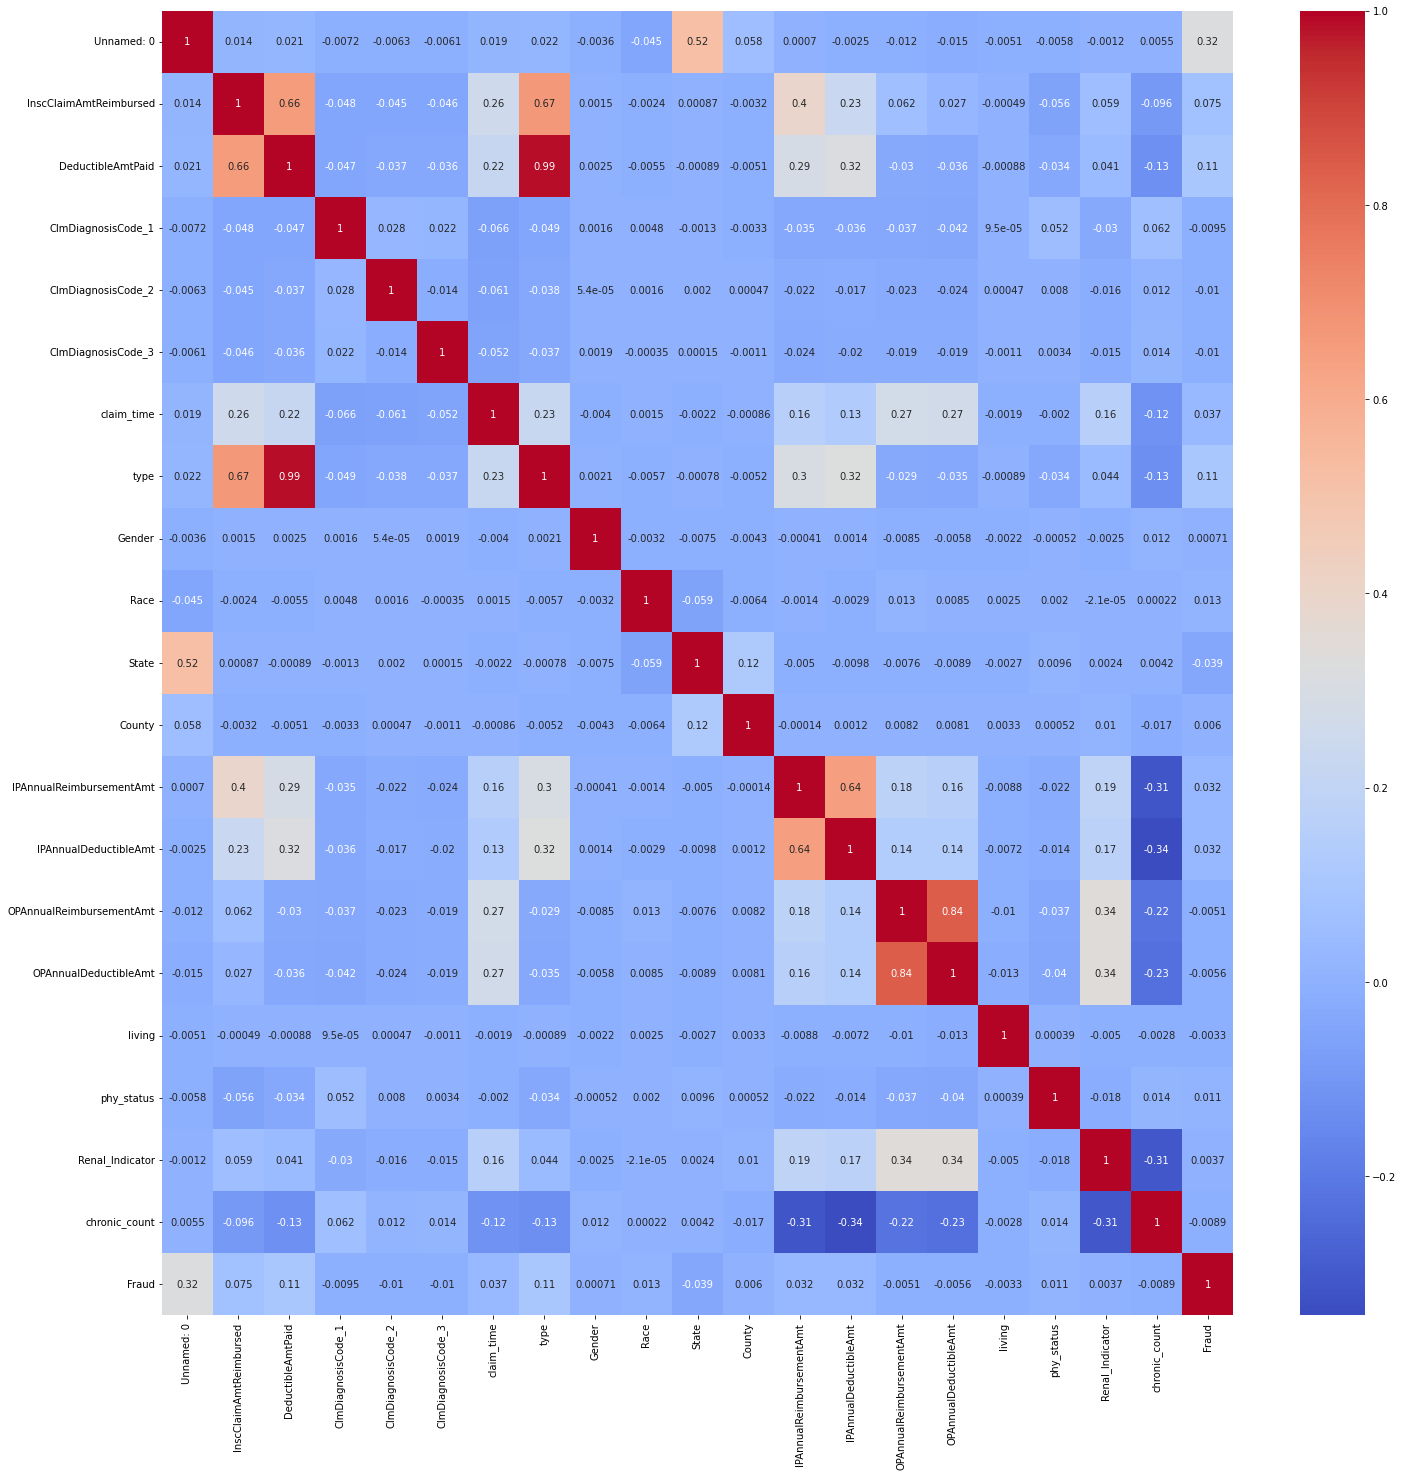

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,24))
corr_matrix = dfd.corr(method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [45]:
del df_imputed
del X_1
del df_final
del df_fin

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

selector = SelectFromModel(rfc, max_features=8)
X_new = selector.fit_transform(X_train_resampled, y_train_resampled)




/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [5]:
mask = selector.get_support()
selected_features = X_train_resampled.columns[mask]
print("Selected features:", selected_features)

Selected features: Index(['InscClaimAmtReimbursed', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'State', 'County', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


In [8]:
X_top = X_train_resampled[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',"Race", 'State','InscClaimAmtReimbursed','ClmDiagnosisCode_3', 'County','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_max_state = MinMaxScaler()
scaler_max = MinMaxScaler()
#X_top[["State"]] = scaler_max_state.inverse_transform(X_top[["State"]])
X_top[["Race","County"]] = scaler_max.fit_transform(X_top[["Race","County"]])
X_top

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,ClmDiagnosisCode_1,ClmDiagnosisCode_2,Race,State,InscClaimAmtReimbursed,ClmDiagnosisCode_3,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,0.000730,0.000074,0.000000,0.000000,-0.130056,0.000625,0.410410,1.139092,2.046168
1,0.000236,0.000041,0.000000,0.000000,9.159414,0.007278,0.510511,0.319893,-0.508671
2,0.000089,0.001790,0.000000,0.000000,2.879209,0.000362,0.160160,-0.002119,0.249797
3,0.000783,0.010226,0.000000,0.000000,-0.242576,0.009483,0.510511,-0.491577,-0.578530
4,0.000712,0.002416,0.000000,0.000000,0.524132,0.000053,0.510511,-0.586893,-0.648389
...,...,...,...,...,...,...,...,...,...
711424,0.002690,0.006550,0.500000,0.830189,-0.193945,0.005842,0.910911,-0.079402,0.768748
711425,0.000298,0.007967,0.444084,0.783767,-0.239408,0.009483,0.839266,-0.125497,0.706248
711426,0.000399,0.010226,0.000000,0.830189,-0.241148,0.009483,0.916376,-0.427411,0.015729
711427,0.000466,0.057389,0.000000,0.835641,-0.156223,0.009483,0.725059,-0.156469,-0.527910


In [9]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

cat_model = CatBoostClassifier(learning_rate=0.1, depth=8, loss_function='Logloss')
rf_model = RandomForestClassifier(max_depth=8)
ada_model = AdaBoostClassifier(n_estimators=550)
lgbm_model = LGBMClassifier(max_depth=8)
nb_model = GaussianNB()
xgb_model = xgb.XGBClassifier(max_depth = 7)

cat_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


cat_pred = cat_model.predict(X_train)
rf_pred = rf_model.predict(X_train)
ada_pred = ada_model.predict(X_train)
nb_pred = nb_model.predict(X_train)
xgb_pred = xgb_model.predict(X_train)

train_base_predictions = np.column_stack((cat_pred, rf_pred, ada_pred,nb_pred,xgb_pred))


cat_pred = cat_model.predict(X_val)
rf_pred = rf_model.predict(X_val)
ada_pred = ada_model.predict(X_val)
nb_pred = nb_model.predict(X_val)
xgb_pred = xgb_model.predict(X_val)


val_base_predictions = np.column_stack((cat_pred, rf_pred, ada_pred,nb_pred,xgb_pred))
lgbm_model.fit(val_base_predictions, y_val)

cat_test_pred = cat_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)
ada_test_pred = ada_model.predict(X_test)
nb_test_pred = nb_model.predict(X_test)
xgb_test_pred = xgb_model.predict(X_test)

test_base_predictions = np.column_stack((cat_test_pred, rf_test_pred, ada_test_pred,nb_test_pred, xgb_test_pred))
meta_test_pred = lgbm_model.predict(test_base_predictions)




0:	learn: 0.6863601	total: 209ms	remaining: 3m 28s
1:	learn: 0.6790187	total: 445ms	remaining: 3m 41s
2:	learn: 0.6734459	total: 555ms	remaining: 3m 4s
3:	learn: 0.6689872	total: 728ms	remaining: 3m 1s
4:	learn: 0.6657029	total: 953ms	remaining: 3m 9s
5:	learn: 0.6602478	total: 1.1s	remaining: 3m 2s
6:	learn: 0.6565003	total: 1.22s	remaining: 2m 52s
7:	learn: 0.6457779	total: 1.3s	remaining: 2m 41s
8:	learn: 0.6331188	total: 1.39s	remaining: 2m 33s
9:	learn: 0.6237096	total: 1.49s	remaining: 2m 27s
10:	learn: 0.6176061	total: 1.58s	remaining: 2m 21s
11:	learn: 0.6127882	total: 1.67s	remaining: 2m 17s
12:	learn: 0.6101633	total: 1.78s	remaining: 2m 15s
13:	learn: 0.6077377	total: 1.91s	remaining: 2m 14s
14:	learn: 0.6058249	total: 2.02s	remaining: 2m 12s
15:	learn: 0.6039620	total: 2.12s	remaining: 2m 10s
16:	learn: 0.6020038	total: 2.22s	remaining: 2m 8s
17:	learn: 0.6000625	total: 2.4s	remaining: 2m 10s
18:	learn: 0.5983816	total: 2.53s	remaining: 2m 10s
19:	learn: 0.5958235	total: 2.

159:	learn: 0.4763777	total: 17.4s	remaining: 1m 31s
160:	learn: 0.4760788	total: 17.6s	remaining: 1m 31s
161:	learn: 0.4757247	total: 17.7s	remaining: 1m 31s
162:	learn: 0.4754877	total: 17.8s	remaining: 1m 31s
163:	learn: 0.4748531	total: 17.9s	remaining: 1m 31s
164:	learn: 0.4744402	total: 18s	remaining: 1m 31s
165:	learn: 0.4742422	total: 18.1s	remaining: 1m 30s
166:	learn: 0.4739632	total: 18.2s	remaining: 1m 30s
167:	learn: 0.4734854	total: 18.3s	remaining: 1m 30s
168:	learn: 0.4732038	total: 18.3s	remaining: 1m 30s
169:	learn: 0.4727147	total: 18.4s	remaining: 1m 29s
170:	learn: 0.4722342	total: 18.5s	remaining: 1m 29s
171:	learn: 0.4717599	total: 18.6s	remaining: 1m 29s
172:	learn: 0.4715738	total: 18.6s	remaining: 1m 29s
173:	learn: 0.4713504	total: 18.8s	remaining: 1m 29s
174:	learn: 0.4709631	total: 18.9s	remaining: 1m 28s
175:	learn: 0.4705319	total: 18.9s	remaining: 1m 28s
176:	learn: 0.4701978	total: 19s	remaining: 1m 28s
177:	learn: 0.4698630	total: 19.1s	remaining: 1m 2

316:	learn: 0.4394218	total: 33.8s	remaining: 1m 12s
317:	learn: 0.4392757	total: 34s	remaining: 1m 12s
318:	learn: 0.4391070	total: 34.1s	remaining: 1m 12s
319:	learn: 0.4390341	total: 34.2s	remaining: 1m 12s
320:	learn: 0.4388579	total: 34.3s	remaining: 1m 12s
321:	learn: 0.4387367	total: 34.4s	remaining: 1m 12s
322:	learn: 0.4386420	total: 34.6s	remaining: 1m 12s
323:	learn: 0.4385329	total: 34.7s	remaining: 1m 12s
324:	learn: 0.4383819	total: 34.8s	remaining: 1m 12s
325:	learn: 0.4382783	total: 34.9s	remaining: 1m 12s
326:	learn: 0.4380065	total: 35s	remaining: 1m 12s
327:	learn: 0.4378321	total: 35.1s	remaining: 1m 12s
328:	learn: 0.4377449	total: 35.3s	remaining: 1m 11s
329:	learn: 0.4376633	total: 35.4s	remaining: 1m 11s
330:	learn: 0.4375435	total: 35.5s	remaining: 1m 11s
331:	learn: 0.4374634	total: 35.6s	remaining: 1m 11s
332:	learn: 0.4372337	total: 35.7s	remaining: 1m 11s
333:	learn: 0.4371169	total: 35.8s	remaining: 1m 11s
334:	learn: 0.4369916	total: 35.9s	remaining: 1m 1

476:	learn: 0.4211239	total: 52.8s	remaining: 57.9s
477:	learn: 0.4210065	total: 52.9s	remaining: 57.8s
478:	learn: 0.4208241	total: 53.1s	remaining: 57.7s
479:	learn: 0.4204703	total: 53.2s	remaining: 57.7s
480:	learn: 0.4203683	total: 53.4s	remaining: 57.6s
481:	learn: 0.4202768	total: 53.5s	remaining: 57.5s
482:	learn: 0.4202349	total: 53.6s	remaining: 57.4s
483:	learn: 0.4201270	total: 53.7s	remaining: 57.3s
484:	learn: 0.4200686	total: 53.9s	remaining: 57.2s
485:	learn: 0.4200012	total: 54s	remaining: 57.1s
486:	learn: 0.4199421	total: 54.1s	remaining: 57s
487:	learn: 0.4198924	total: 54.2s	remaining: 56.9s
488:	learn: 0.4198190	total: 54.3s	remaining: 56.8s
489:	learn: 0.4196492	total: 54.4s	remaining: 56.6s
490:	learn: 0.4195796	total: 54.5s	remaining: 56.5s
491:	learn: 0.4194281	total: 54.6s	remaining: 56.4s
492:	learn: 0.4193863	total: 54.8s	remaining: 56.3s
493:	learn: 0.4193394	total: 54.9s	remaining: 56.2s
494:	learn: 0.4192821	total: 55s	remaining: 56.1s
495:	learn: 0.4192

635:	learn: 0.4081069	total: 1m 13s	remaining: 42.1s
636:	learn: 0.4079412	total: 1m 13s	remaining: 42s
637:	learn: 0.4078657	total: 1m 13s	remaining: 41.9s
638:	learn: 0.4077233	total: 1m 13s	remaining: 41.7s
639:	learn: 0.4076756	total: 1m 14s	remaining: 41.6s
640:	learn: 0.4075218	total: 1m 14s	remaining: 41.5s
641:	learn: 0.4074763	total: 1m 14s	remaining: 41.4s
642:	learn: 0.4074217	total: 1m 14s	remaining: 41.3s
643:	learn: 0.4073897	total: 1m 14s	remaining: 41.2s
644:	learn: 0.4073095	total: 1m 14s	remaining: 41.1s
645:	learn: 0.4071668	total: 1m 14s	remaining: 41s
646:	learn: 0.4071434	total: 1m 14s	remaining: 40.8s
647:	learn: 0.4070755	total: 1m 15s	remaining: 40.8s
648:	learn: 0.4069338	total: 1m 15s	remaining: 40.7s
649:	learn: 0.4068742	total: 1m 15s	remaining: 40.7s
650:	learn: 0.4068089	total: 1m 15s	remaining: 40.6s
651:	learn: 0.4067469	total: 1m 15s	remaining: 40.5s
652:	learn: 0.4067132	total: 1m 16s	remaining: 40.4s
653:	learn: 0.4066741	total: 1m 16s	remaining: 40.

792:	learn: 0.3986578	total: 1m 37s	remaining: 25.3s
793:	learn: 0.3985763	total: 1m 37s	remaining: 25.2s
794:	learn: 0.3985336	total: 1m 37s	remaining: 25.1s
795:	learn: 0.3984843	total: 1m 37s	remaining: 25s
796:	learn: 0.3984404	total: 1m 37s	remaining: 24.8s
797:	learn: 0.3983444	total: 1m 37s	remaining: 24.7s
798:	learn: 0.3981821	total: 1m 37s	remaining: 24.6s
799:	learn: 0.3981401	total: 1m 37s	remaining: 24.5s
800:	learn: 0.3980923	total: 1m 37s	remaining: 24.3s
801:	learn: 0.3980633	total: 1m 38s	remaining: 24.2s
802:	learn: 0.3980310	total: 1m 38s	remaining: 24.1s
803:	learn: 0.3979394	total: 1m 38s	remaining: 24s
804:	learn: 0.3978730	total: 1m 38s	remaining: 23.8s
805:	learn: 0.3977932	total: 1m 38s	remaining: 23.7s
806:	learn: 0.3977573	total: 1m 38s	remaining: 23.6s
807:	learn: 0.3977294	total: 1m 38s	remaining: 23.4s
808:	learn: 0.3976904	total: 1m 38s	remaining: 23.3s
809:	learn: 0.3976105	total: 1m 38s	remaining: 23.2s
810:	learn: 0.3974988	total: 1m 38s	remaining: 23.

949:	learn: 0.3910543	total: 1m 53s	remaining: 5.98s
950:	learn: 0.3910198	total: 1m 53s	remaining: 5.86s
951:	learn: 0.3909955	total: 1m 53s	remaining: 5.74s
952:	learn: 0.3909602	total: 1m 53s	remaining: 5.62s
953:	learn: 0.3909048	total: 1m 54s	remaining: 5.5s
954:	learn: 0.3908621	total: 1m 54s	remaining: 5.38s
955:	learn: 0.3907763	total: 1m 54s	remaining: 5.26s
956:	learn: 0.3907439	total: 1m 54s	remaining: 5.14s
957:	learn: 0.3907239	total: 1m 54s	remaining: 5.02s
958:	learn: 0.3906703	total: 1m 54s	remaining: 4.9s
959:	learn: 0.3906170	total: 1m 54s	remaining: 4.78s
960:	learn: 0.3905032	total: 1m 54s	remaining: 4.66s
961:	learn: 0.3904736	total: 1m 54s	remaining: 4.54s
962:	learn: 0.3903641	total: 1m 55s	remaining: 4.42s
963:	learn: 0.3902881	total: 1m 55s	remaining: 4.3s
964:	learn: 0.3901723	total: 1m 55s	remaining: 4.18s
965:	learn: 0.3901485	total: 1m 55s	remaining: 4.06s
966:	learn: 0.3900697	total: 1m 55s	remaining: 3.94s
967:	learn: 0.3900001	total: 1m 55s	remaining: 3.

<ipython-input-9-a508f290a9ff>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False 

[12:20:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'base_predictions' is not defined

In [11]:
stacked_pred = lgbm_model.predict(val_base_predictions)
print("Stacked Ensemble accuracy on validation set:", accuracy_score(y_val, stacked_pred))
print("Stacked Ensemble accuracy on test set:", accuracy_score(y_test, meta_test_pred))

Stacked Ensemble accuracy on validation set: 0.813811618852171
Stacked Ensemble accuracy on test set: 0.8151349831765191


In [12]:
X_train_meta = np.concatenate([X_train, train_base_predictions], axis=1)
X_test_meta = np.concatenate([X_test, test_base_predictions], axis=1)
X_val_meta = np.concatenate([X_val, val_base_predictions], axis=1)

In [14]:
X = np.concatenate([X_train_meta,X_test_meta,X_val_meta],0)
y = np.concatenate([y_train, y_test, y_val],0)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,shuffle=True,stratify=y)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

input_shape = X_train_meta.shape[1]
input_layer = Input(shape=(input_shape,))

dense_layer_1 = Dense(64, activation='relu',kernel_regularizer= regularizers.l1(0.05))(input_layer)
batch_norm_1 = BatchNormalization()(dense_layer_1)
dropout_1 = Dropout(0.2)(batch_norm_1)

dense_layer_2 = Dense(128, activation='relu',kernel_regularizer= regularizers.l1(0.05))(dropout_1)
batch_norm_2 = BatchNormalization()(dense_layer_2)
dropout_2 = Dropout(0.2)(batch_norm_2)

dense_layer_3 = Dense(256, activation='relu',kernel_regularizer= regularizers.l1(0.05))(dropout_2)
batch_norm_3 = BatchNormalization()(dense_layer_3)
dropout_3 = Dropout(0.2)(batch_norm_3)

dense_layer_4 = Dense(512, activation='relu')(dropout_3)
batch_norm_4 = BatchNormalization()(dense_layer_4)
dropout_4 = Dropout(0.2)(batch_norm_4)

concat_layer = Concatenate()([dropout_1, dropout_2, dropout_3, dropout_4])

dense_layer_final = Dense(128, activation='relu')(concat_layer)
batch_norm_final = BatchNormalization()(dense_layer_final)
dropout_final = Dropout(0.2)(batch_norm_final)
dense_layer_finall= Dense(32,activation='relu')(dropout_final)
#batch_norm_final = BatchNormalization()(dense_layer_finall)
#dropout_finall= Dropout(0.2)(dense_layer_finall)
#dense_layer_finalll=  Dense(6,activation='relu')(batch_norm_final)
output_layer = Dense(1, activation='sigmoid')(dense_layer_finall)

opt = Adam(lr=0.005, decay=1e-5)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           1600        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64)          256         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['batch_normalization[0][0]']

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


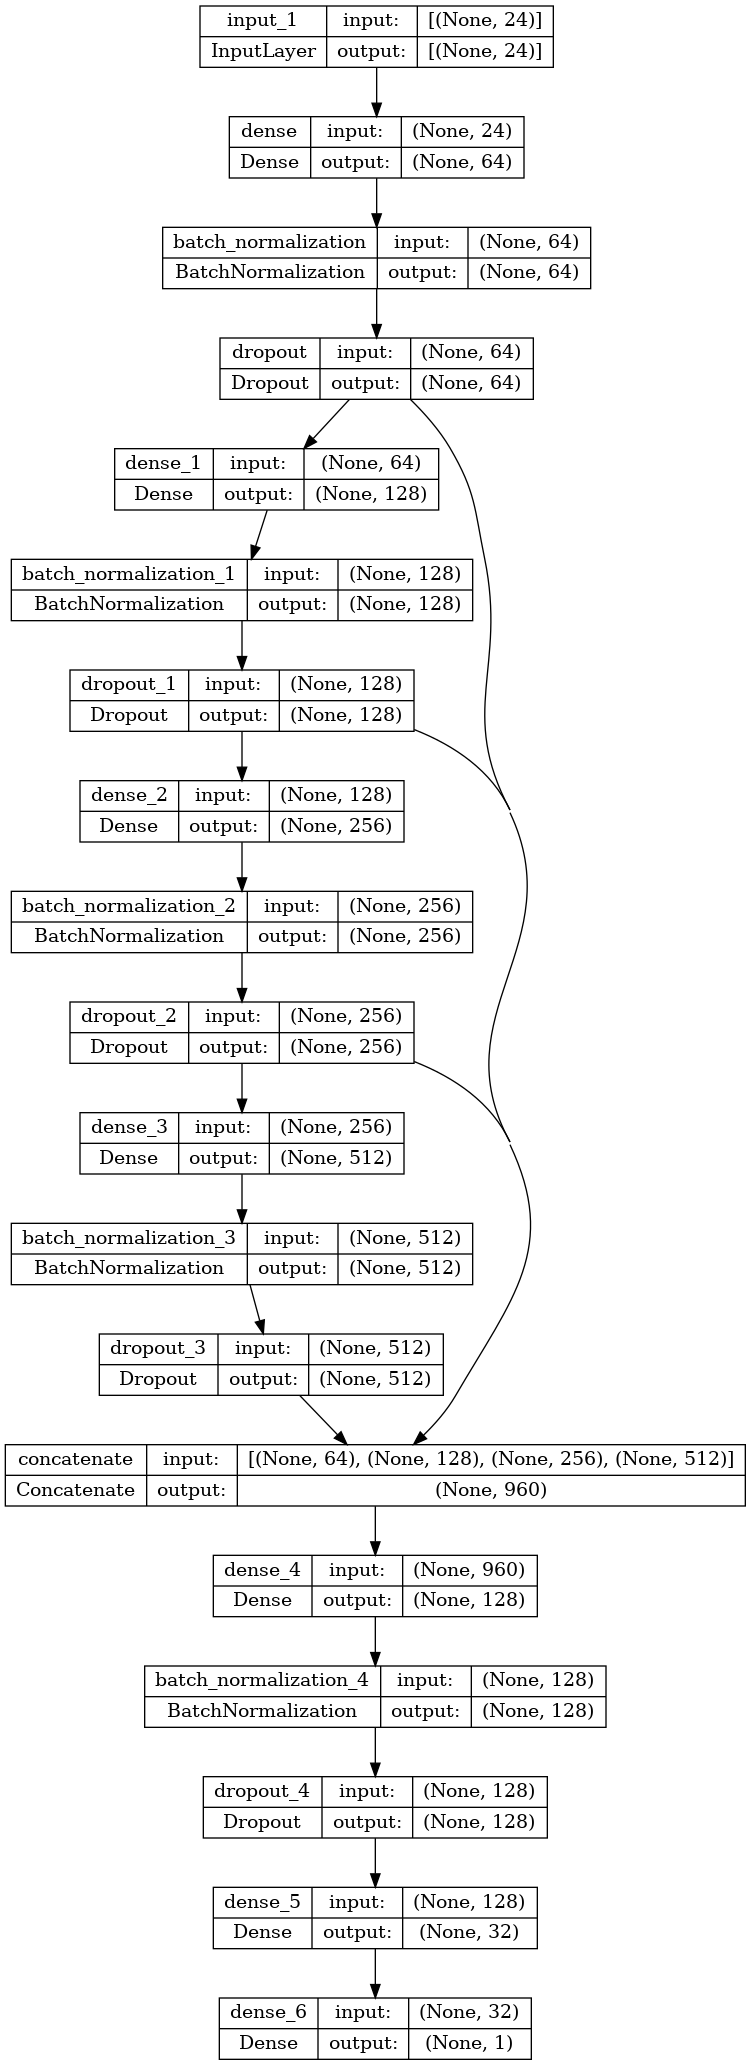

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
early_stop = EarlyStopping(monitor='val_loss', patience=12, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
csv_logger = CSVLogger('training.log')


history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=[X_test,y_test], callbacks=[lr_schedule, early_stop, checkpoint, csv_logger])


Epoch 1/350
16675/16675 [==============================] - ETA: 0s - loss: 1.9245 - accuracy: 0.7991
Epoch 1: val_accuracy improved from -inf to 0.82028, saving model to best_model.h5
16675/16675 [==============================] - 138s 8ms/step - loss: 1.9245 - accuracy: 0.7991 - val_loss: 1.6019 - val_accuracy: 0.8203 - lr: 0.0050
Epoch 2/350
16675/16675 [==============================] - ETA: 0s - loss: 1.5349 - accuracy: 0.8034
Epoch 2: val_accuracy did not improve from 0.82028
16675/16675 [==============================] - 147s 9ms/step - loss: 1.5349 - accuracy: 0.8034 - val_loss: 1.4875 - val_accuracy: 0.7766 - lr: 0.0050
Epoch 3/350
16671/16675 [============================>.] - ETA: 0s - loss: 1.3951 - accuracy: 0.8040
Epoch 3: val_accuracy did not improve from 0.82028
16675/16675 [==============================] - 142s 8ms/step - loss: 1.3951 - accuracy: 0.8040 - val_loss: 1.3292 - val_accuracy: 0.8196 - lr: 0.0050
Epoch 4/350
16671/16675 [============================>.] - ETA

Epoch 28/350
16672/16675 [============================>.] - ETA: 0s - loss: 0.6954 - accuracy: 0.8150
Epoch 28: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 121s 7ms/step - loss: 0.6954 - accuracy: 0.8150 - val_loss: 0.6831 - val_accuracy: 0.8200 - lr: 0.0050
Epoch 29/350
16668/16675 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.8144
Epoch 29: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 104s 6ms/step - loss: 0.7037 - accuracy: 0.8144 - val_loss: 0.6758 - val_accuracy: 0.8196 - lr: 0.0050
Epoch 30/350
16672/16675 [============================>.] - ETA: 0s - loss: 0.6787 - accuracy: 0.8155
Epoch 30: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 105s 6ms/step - loss: 0.6787 - accuracy: 0.8155 - val_loss: 0.6660 - val_accuracy: 0.8195 - lr: 0.0050
Epoch 31/350
16670/16675 [============================>.] - ETA: 0s - loss: 0.6769 - acc

Epoch 55/350
16674/16675 [============================>.] - ETA: 0s - loss: 0.6201 - accuracy: 0.8152
Epoch 55: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 128s 8ms/step - loss: 0.6201 - accuracy: 0.8152 - val_loss: 0.5833 - val_accuracy: 0.8185 - lr: 0.0050
Epoch 56/350
16670/16675 [============================>.] - ETA: 0s - loss: 0.6172 - accuracy: 0.8153
Epoch 56: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 129s 8ms/step - loss: 0.6172 - accuracy: 0.8153 - val_loss: 0.6379 - val_accuracy: 0.8150 - lr: 0.0050
Epoch 57/350
16669/16675 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.8160
Epoch 57: val_accuracy did not improve from 0.82072
16675/16675 [==============================] - 128s 8ms/step - loss: 0.6104 - accuracy: 0.8160 - val_loss: 0.6380 - val_accuracy: 0.7987 - lr: 0.0050
Epoch 58/350
16672/16675 [============================>.] - ETA: 0s - loss: 0.6095 - acc

Epoch 82/350
16672/16675 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.8165
Epoch 82: val_accuracy did not improve from 0.82086
16675/16675 [==============================] - 103s 6ms/step - loss: 0.5684 - accuracy: 0.8165 - val_loss: 0.5626 - val_accuracy: 0.8193 - lr: 0.0050
Epoch 83/350
16672/16675 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.8171
Epoch 83: val_accuracy did not improve from 0.82086
16675/16675 [==============================] - 103s 6ms/step - loss: 0.5645 - accuracy: 0.8171 - val_loss: 0.6134 - val_accuracy: 0.8187 - lr: 0.0050
Epoch 84/350
16675/16675 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.8161
Epoch 84: val_accuracy did not improve from 0.82086
16675/16675 [==============================] - 103s 6ms/step - loss: 0.5729 - accuracy: 0.8161 - val_loss: 0.5553 - val_accuracy: 0.8198 - lr: 0.0050
Epoch 85/350
16668/16675 [============================>.] - ETA: 0s - loss: 0.4756 - acc

16675/16675 [==============================] - 97s 6ms/step - loss: 0.4607 - accuracy: 0.8196 - val_loss: 0.4587 - val_accuracy: 0.8211 - lr: 5.0000e-05
Epoch 109/350
16668/16675 [============================>.] - ETA: 0s - loss: 0.4606 - accuracy: 0.8193
Epoch 109: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 96s 6ms/step - loss: 0.4606 - accuracy: 0.8193 - val_loss: 0.4586 - val_accuracy: 0.8214 - lr: 5.0000e-05
Epoch 110/350
16675/16675 [==============================] - ETA: 0s - loss: 0.4606 - accuracy: 0.8195
Epoch 110: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 97s 6ms/step - loss: 0.4606 - accuracy: 0.8195 - val_loss: 0.4593 - val_accuracy: 0.8213 - lr: 5.0000e-05
Epoch 111/350
16666/16675 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.8195
Epoch 111: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 96s 6ms/step - loss: 0.460

Epoch 135/350
16674/16675 [============================>.] - ETA: 0s - loss: 0.4594 - accuracy: 0.8197
Epoch 135: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 131s 8ms/step - loss: 0.4595 - accuracy: 0.8197 - val_loss: 0.4575 - val_accuracy: 0.8211 - lr: 5.0000e-09
Epoch 136/350
16669/16675 [============================>.] - ETA: 0s - loss: 0.4595 - accuracy: 0.8195
Epoch 136: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 131s 8ms/step - loss: 0.4595 - accuracy: 0.8195 - val_loss: 0.4577 - val_accuracy: 0.8212 - lr: 5.0000e-09
Epoch 137/350
16668/16675 [============================>.] - ETA: 0s - loss: 0.4596 - accuracy: 0.8194
Epoch 137: val_accuracy did not improve from 0.82268
16675/16675 [==============================] - 117s 7ms/step - loss: 0.4596 - accuracy: 0.8194 - val_loss: 0.4577 - val_accuracy: 0.8212 - lr: 5.0000e-09
Epoch 138/350
16674/16675 [============================>.] - ETA: 0s -

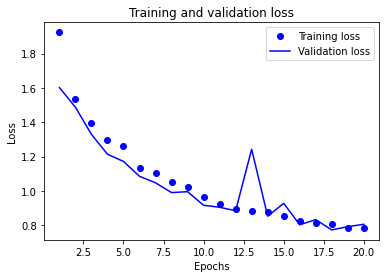

In [25]:
import matplotlib.pyplot as plt

train_loss = history.history['loss'][:20]
val_loss = history.history['val_loss'][:20]
epochs = range(1, 21)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
#y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred
from sklearn.metrics import classification_report, confusion_matrix, auc

target_names = ['Fraud', 'Not_Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Fraud       0.79      0.87      0.83     86354
   Not_Fraud       0.86      0.78      0.82     91504

    accuracy                           0.82    177858
   macro avg       0.82      0.82      0.82    177858
weighted avg       0.83      0.82      0.82    177858



In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.8225604528947628

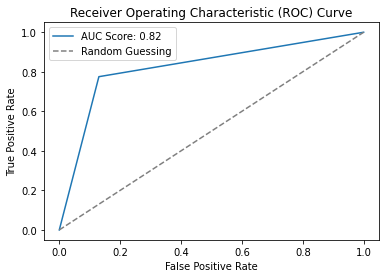

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC Score: {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


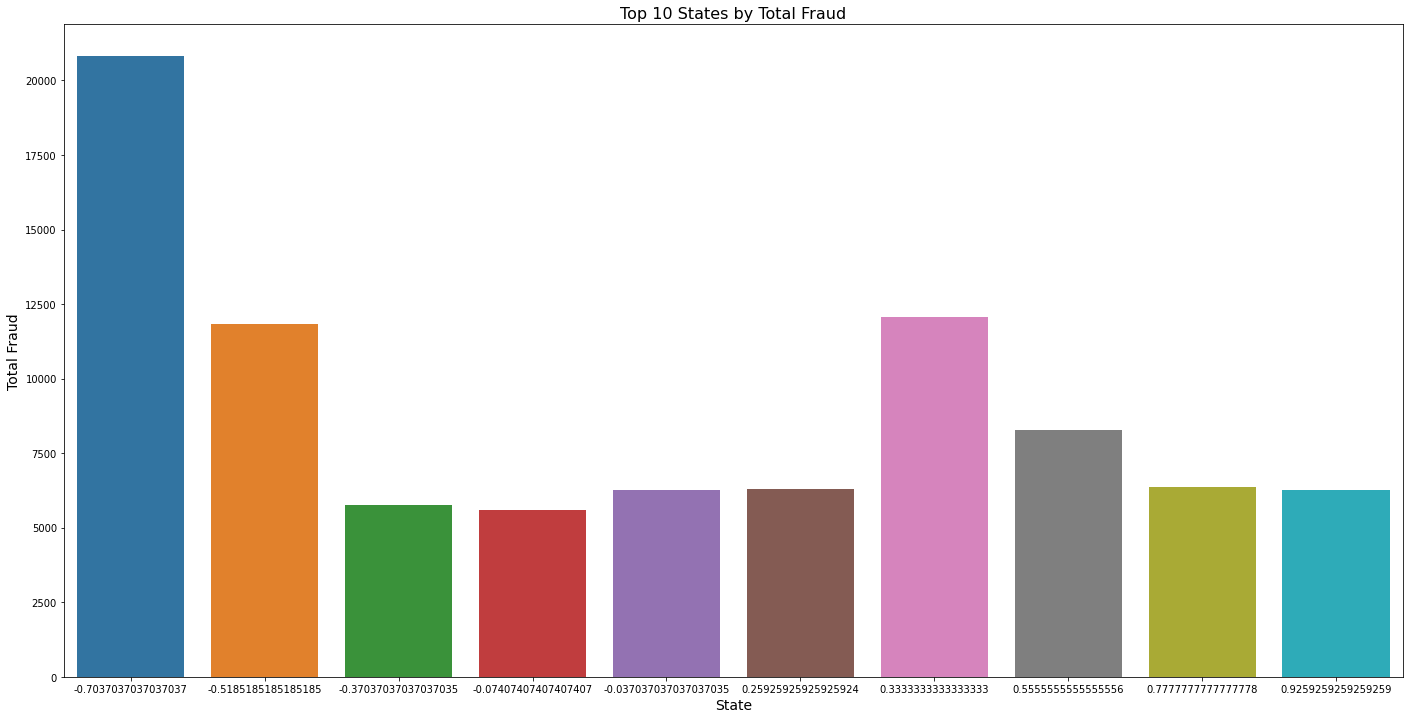

In [131]:

# BI work: distribution of the fraud cases by states by states

dd = df_sum.reset_index()
dd= dd[dd['Fraud']>0]
dd.groupby('State')['Fraud'].agg('max').sort_values(ascending=False)


df_sum = dd.groupby('State')['Fraud'].agg('sum').reset_index().sort_values(by='Fraud', ascending=False)

fig = plt.figure(figsize=(24,12))
sns.barplot(x='State', y='Fraud', data=df_sum.head(10))
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Fraud', fontsize=14)
plt.title('Top 10 States by Total Fraud', fontsize=16)

# Show the plot
plt.show()